In [1]:
import pandas as pd
import numpy as np

In [2]:
fname = '35100155.csv' #Average counts of offenders in federal programs, Canada and regions
avg_count = pd.read_csv(fname)
avg_count

,REF_DATE,GEO,DGUID,Custodial and community supervision,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1978/1979,Canada,2016A000011124,Actual-in count,Persons,249,units,0,v21536947,1.1,8530.0,NaN,NaN,NaN,1
1,1978/1979,Canada,2016A000011124,On-register count,Persons,249,units,0,v21536948,1.2,9431.0,NaN,NaN,NaN,1
2,1978/1979,Canada,2016A000011124,"Incarceration rates per 100,000 adults",Rate,257,units,0,v21536949,1.3,50.9,NaN,NaN,NaN,2
3,1978/1979,Canada,2016A000011124,Total community supervision count,Persons,249,units,0,v21536950,1.4,7099.0,NaN,NaN,NaN,1
4,1978/1979,Canada,2016A000011124,"Day parole, community supervision",Persons,249,units,0,v21536951,1.5,1090.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2022/2023,Pacific Region,NaN,Total community supervision count,Persons,249,units,0,v21536980,6.4,1273.3,NaN,NaN,NaN,1
2060,2022/2023,Pacific Region,NaN,"Day parole, community supervision",Persons,249,units,0,v21536981,6.5,298.8,NaN,NaN,NaN,1
2061,2022/2023,Pacific Region,NaN,"Full parole, community supervision",Persons,249,units,0,v21536982,6.6,607.1,NaN,NaN,NaN,1
2062,2022/2023,Pacific Region,NaN,"Statutory release, community supervision",Persons,249,units,0,v21536983,6.7,289.0,NaN,NaN,NaN,1


Rate of serious crimes by psychopaths: 0.20
Rate of serious crimes by non-psychopaths: 0.05


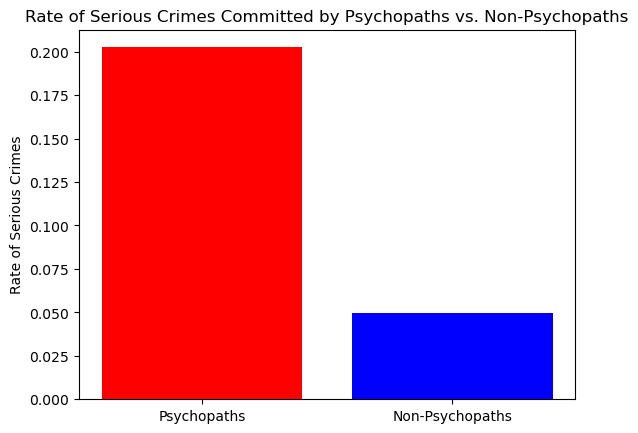

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Define the population size and proportions
total_population = 10000
prison_population_proportion = 0.05  # Assume 5% of the population is in federal prisons
psychopathy_general_population = 0.01
psychopathy_prison_population = 0.25

# Generate the population
population = pd.DataFrame({
    "is_in_prison": np.random.choice([0, 1], size=total_population, p=[1-prison_population_proportion, prison_population_proportion]),
})

# Assign psychopathy based on whether they are in prison or not
population['is_psychopath'] = population['is_in_prison'].apply(
    lambda x: np.random.choice([0, 1], p=[1-psychopathy_prison_population if x == 1 else 1-psychopathy_general_population, 
                                          psychopathy_prison_population if x == 1 else psychopathy_general_population])
)

# Simulate serious crimes committed based on psychopathy
# Assuming that psychopaths are 5 times more likely to commit serious crimes
population['committed_serious_crime'] = population['is_psychopath'].apply(
    lambda x: np.random.choice([0, 1], p=[0.8 if x == 1 else 0.95, 0.2 if x == 1 else 0.05])
)

# Analysis
prison_population = population[population['is_in_prison'] == 1]
general_population = population[population['is_in_prison'] == 0]

# Calculate rates of serious crimes
rate_serious_crimes_psychopaths = population[population['is_psychopath'] == 1]['committed_serious_crime'].mean()
rate_serious_crimes_non_psychopaths = population[population['is_psychopath'] == 0]['committed_serious_crime'].mean()

print(f"Rate of serious crimes by psychopaths: {rate_serious_crimes_psychopaths:.2f}")
print(f"Rate of serious crimes by non-psychopaths: {rate_serious_crimes_non_psychopaths:.2f}")

# Plot the results
labels = ['Psychopaths', 'Non-Psychopaths']
rates = [rate_serious_crimes_psychopaths, rate_serious_crimes_non_psychopaths]

plt.bar(labels, rates, color=['red', 'blue'])
plt.ylabel('Rate of Serious Crimes')
plt.title('Rate of Serious Crimes Committed by Psychopaths vs. Non-Psychopaths')
plt.show()


In [4]:
import pandas as pd

# Sample data obtained from the image provided.
# In a real scenario, you would have exact values from the data source.
data = {
    'Fiscal Year': ['2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Total Custodial Admissions': [7558, 7326, 5761, 6886, 7287],
    # ... include other categories as needed
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Assume 25% of the federal prison population meets the criteria for psychopathy
psychopathy_proportion = 0.25

# Calculate the estimated number of psychopaths
df['Estimated Psychopaths'] = df['Total Custodial Admissions'] * psychopathy_proportion

# Assuming a specific rate at which psychopaths commit serious crimes, say 5%
# This is an arbitrary number for demonstration purposes
serious_crime_rate = 0.05

# Calculate the estimated number of serious crimes by psychopaths
df['Estimated Serious Crimes by Psychopaths'] = df['Estimated Psychopaths'] * serious_crime_rate

# Print the estimated numbers
print(df[['Fiscal Year', 'Estimated Psychopaths', 'Estimated Serious Crimes by Psychopaths']])


  Fiscal Year  Estimated Psychopaths  Estimated Serious Crimes by Psychopaths
0   2018/2019                1889.50                                  94.4750
1   2019/2020                1831.50                                  91.5750
2   2020/2021                1440.25                                  72.0125
3   2021/2022                1721.50                                  86.0750
4   2022/2023                1821.75                                  91.0875


In [5]:
import numpy as np

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population

# Federal prison population admissions data for each year
admissions_by_year = {
    '2018/2019': 7558,
    '2019/2020': 7326,
    '2020/2021': 5761,
    '2021/2022': 6886,
    '2022/2023': 7287
}

# Simulating psychopathy prevalence
psychopathy_counts = {}

# Run simulation for each year
for year, total_admissions in admissions_by_year.items():
    # Initialize population for the year
    population = np.zeros(total_admissions)
    
    # Assign psychopathy flag based on prevalence
    psychopaths = int(total_admissions * PSYCHOPATHY_PREVALENCE)
    population[:psychopaths] = 1
    
    # Shuffle to randomize the psychopathy distribution
    np.random.shuffle(population)
    
    # Calculate the number of psychopaths
    psychopathy_counts[year] = np.sum(population)

# Output results
for year, count in psychopathy_counts.items():
    print(f"Year {year}: {count} psychopaths in federal prison population")


Year 2018/2019: 1889.0 psychopaths in federal prison population
Year 2019/2020: 1831.0 psychopaths in federal prison population
Year 2020/2021: 1440.0 psychopaths in federal prison population
Year 2021/2022: 1721.0 psychopaths in federal prison population
Year 2022/2023: 1821.0 psychopaths in federal prison population


In [6]:
import numpy as np
import pandas as pd

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population

# Federal prison population admissions data for each year
admissions_by_year = {
    '2018/2019': 7558,
    '2019/2020': 7326,
    '2020/2021': 5761,
    '2021/2022': 6886,
    '2022/2023': 7287
}

# Simulating psychopathy prevalence
psychopathy_counts = {}

# Run simulation for each year
for year, total_admissions in admissions_by_year.items():
    # Initialize population for the year
    population = np.zeros(total_admissions)
    
    # Assign psychopathy flag based on prevalence
    psychopaths = int(total_admissions * PSYCHOPATHY_PREVALENCE)
    population[:psychopaths] = 1
    
    # Shuffle to randomize the psychopathy distribution
    np.random.shuffle(population)
    
    # Calculate the number of psychopaths
    psychopathy_counts[year] = np.sum(population)

# Convert to DataFrame for better visualization
psychopathy_df = pd.DataFrame(list(psychopathy_counts.items()), columns=['Year', 'Number of Psychopaths'])
psychopathy_df['Total Admissions'] = psychopathy_df['Year'].map(admissions_by_year)
psychopathy_df['Percentage of Psychopaths'] = PSYCHOPATHY_PREVALENCE * 100  # Percentage for clarity

psychopathy_df


,Year,Number of Psychopaths,Total Admissions,Percentage of Psychopaths
0,2018/2019,1889.0,7558,25.0
1,2019/2020,1831.0,7326,25.0
2,2020/2021,1440.0,5761,25.0
3,2021/2022,1721.0,6886,25.0
4,2022/2023,1821.0,7287,25.0


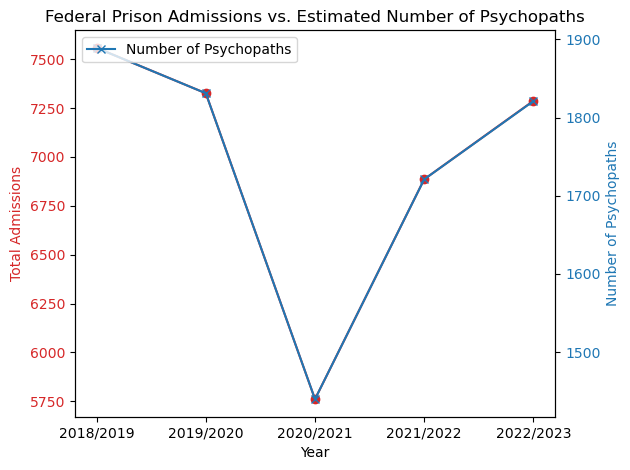

In [7]:
import matplotlib.pyplot as plt

# Data for plotting
years = ['2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023']
psychopaths = [1889, 1831, 1440, 1721, 1821]
total_admissions = [7558, 7326, 5761, 6886, 7287]

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plotting the total admissions on y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Admissions', color='tab:red')
ax1.plot(years, total_admissions, color='tab:red', marker='o', label='Total Admissions')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Creating a second y-axis to plot the number of psychopaths
ax2 = ax1.twinx()  
ax2.set_ylabel('Number of Psychopaths', color='tab:blue')
ax2.plot(years, psychopaths, color='tab:blue', marker='x', label='Number of Psychopaths')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title
plt.title('Federal Prison Admissions vs. Estimated Number of Psychopaths')

# Show the plot with a legend
fig.tight_layout()
plt.legend(loc="upper left")
plt.show()


In [8]:
probabilities = {
    'high_understanding': 0.20,
    'moderate_understanding': 0.70,
    'low_understanding': 0.10
}

# Outcomes could be a binary decision: 
# 1 if psychopathy is considered a mitigating factor, 0 otherwise
outcomes = {
    'high_understanding': 1,
    'moderate_understanding': np.random.choice([1, 0], p=[0.7, 0.3]),
    'low_understanding': 0
}


In [9]:
def simulate_juror_decision():
    understanding = np.random.choice(list(probabilities.keys()), p=list(probabilities.values()))
    return outcomes[understanding]


In [10]:
def simulate_jury():
    jury_decisions = [simulate_juror_decision() for _ in range(12)]
    return np.mean(jury_decisions)  # Return the average decision score for the jury


In [11]:
def simulate_multiple_juries(num_simulations=1000):
    jury_scores = [simulate_jury() for _ in range(num_simulations)]
    return np.mean(jury_scores)  # The overall average score


In [12]:
# Assuming 1000 jury simulations
overall_perception_score = simulate_multiple_juries(1000)

print(f"The average perception score across simulated juries is: {overall_perception_score}")

# If the score is closer to 1, it suggests juries are likely to view psychopathy as a mitigating factor
# Closer to 0 suggests they are unlikely to view it as such


The average perception score across simulated juries is: 0.19541666666666668


Given the average perception score of approximately 0.195 from our simulated juries, this suggests that under our model's assumptions, it's fairly unlikely that a randomly selected jury will consider psychopathy as a mitigating factor in their decision-making.

This is based on the hypothetical probabilities assigned to jurors' understanding of psychopathy:

* A high understanding juror (20% probability) would always consider psychopathy as a mitigating factor (yielding an outcome of 1).
* A moderate understanding juror (70% probability) would consider psychopathy as a mitigating factor 70% of the time (yielding an outcome of 0.7 on average).
* A low understanding juror (10% probability) would never consider psychopathy as a mitigating factor (yielding an outcome of 0).
* The score of around 0.2 indicates that the composition of a typical jury, as per the model, leans towards lower understanding—or at least a lower propensity to let psychopathy influence their judgement significantly. To further this study, we might collect actual survey data on juror attitudes or conduct a detailed review of case law where psychopathy was discussed in court to see if our model's outcomes align with real-world decisions.

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming we have some data related to juror perceptions and their respective scores
# For the sake of this example, let's generate some dummy data that will act as our dataset for the linear regression

# Let's generate some random data for juror's understanding level
np.random.seed(0)  # for reproducibility
understanding_level = np.random.choice(['Low', 'Moderate', 'High'], 100, p=[0.1, 0.7, 0.2])

# Assign scores to understanding levels (Low: 0, Moderate: 0.7, High: 1)
score_mapping = {'Low': 0, 'Moderate': 0.7, 'High': 1}
scores = np.array([score_mapping[ul] for ul in understanding_level])

# Create a DataFrame
df = pd.DataFrame({
    'UnderstandingLevel': understanding_level,
    'Score': scores
})

# One-hot encode the categorical variable 'UnderstandingLevel' for regression analysis
df_encoded = pd.get_dummies(df, columns=['UnderstandingLevel'], drop_first=True)

# Define the features and the target
X = df_encoded.drop('Score', axis=1)
y = df_encoded['Score']



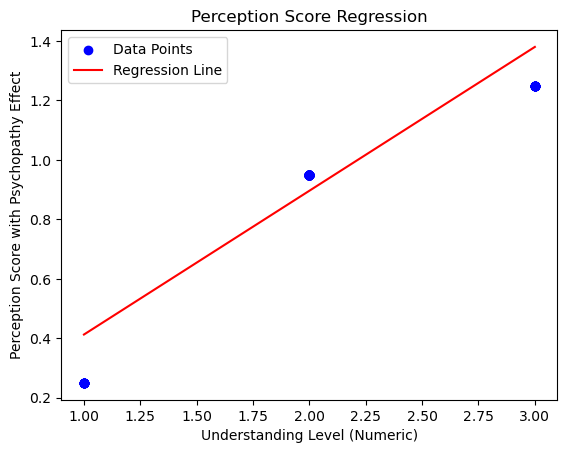

(0.4837235228539577, -0.07095875139353425, 0.8896182620537118)

In [14]:
# Correct the issue with one-hot encoding where no "High" category might have been created
# because it could have been converted to the reference category

# Add a small constant to the understanding level to represent the effect of psychopathy
# Assuming psychopathy increases the severity of the score by a factor
psychopathy_effect = 0.25
df['PsychopathyEffect'] = df['Score'] + psychopathy_effect

# Prepare the data for Linear Regression
# Convert the understanding levels to numerical values for regression analysis
understanding_levels_num = df['UnderstandingLevel'].map({'Low': 1, 'Moderate': 2, 'High': 3})

# Perform Linear Regression
X = understanding_levels_num.values.reshape(-1, 1)  # Features
y = df['PsychopathyEffect'].values  # Target variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Generate a range of values for understanding levels to predict and plot the regression line
x_values = np.linspace(min(X), max(X), num=100).reshape(-1, 1)
predicted = model.predict(x_values)

# Plot the original data and the regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(x_values, predicted, color='red', label='Regression Line')

plt.xlabel('Understanding Level (Numeric)')
plt.ylabel('Perception Score with Psychopathy Effect')
plt.title('Perception Score Regression')
plt.legend()
plt.show()

# Return the coefficients
model.coef_[0], model.intercept_, model.score(X, y)


In [15]:
import pandas as pd

# Extracting relevant data from the provided text
data = {
    "Profile": ["Prototypic Psychopathy (C1)", "Callous–Conning (C2)", "Externalizing (C3)", "General Offender (C4)"],
    "PCL-R_Interpersonal": [1.40, 1.20, 0.56, 0.35],
    "PCL-R_Affective": [1.62, 1.33, 1.23, 0.70],
    "PCL-R_Lifestyle": [1.50, 1.00, 1.19, 0.72],
    "PCL-R_Antisocial": [1.58, 0.51, 1.35, 0.56],
    "SRP_Interpersonal": [50.71, 39.77, 44.05, 40.41],
    "SRP_Affective": [40.15, 36.50, 68.68, 64.35],
    "SRP_Lifestyle": [55.05, 46.15, 46.70, 45.30],
    "SRP_Antisocial": [50.53, 39.40, 37.03, 33.61],
    "PPI_BlameExternalization": [45.95, 39.84, 37.38, 35.90],
    "PPI_MachiavellianEgocentricity": [74.71, 38.64, 49.46, 44.50],
    "PPI_Coldheartedness": [48.60, 32.25, 31.66, 31.66],
    "PPI_ImpulsiveNonconformity": [39.84, 67.72, 65.04, 62.19],
    "PPI_CarefreeNonplanfulness": [38.64, 67.72, 65.04, 62.19],
    "PPI_Fearlessness": [49.46, 32.25, 31.66, 31.66],
    "PPI_StressImmunity": [32.25, 67.72, 65.04, 62.19],
    "PPI_SocialPotency": [67.72, 65.04, 62.19, 62.19],
    "ViolentCrimes": [5.50, 3.71, 1.83, 1.83],
    "NonViolentCrimes": [14.24, 12.21, 6.06, 6.06],
    "TotalCrimes": [19.73, 15.91, 7.88, 7.88],
    "CD_AggressiveSymptoms": [2.04, 1.45, 0.40, 0.40],
    "CD_AntisocialSymptoms": [3.37, 2.65, 1.00, 1.00],
    "SCL90R_Somatization": [0.66, 0.56, 0.43, 0.43],
    "SCL90R_ObsessiveCompulsive": [0.97, 0.98, 0.78, 0.78],
    "SCL90R_InterpersonalSensitivity": [0.75, 0.67, 0.60, 0.60],
    "SCL90R_Depression": [0.90, 0.90, 0.81, 0.81],
    "SCL90R_Anxiety": [0.63, 0.48, 0.44, 0.44],
    "SCL90R_Hostility": [0.87, 0.64, 0.41, 0.41],
    "SCL90R_ParanoidIdeation": [1.26, 1.09, 0.91, 0.91],
    "SCL90R_Psychoticism": [0.63, 0.54, 0.50, 0.50],
    "SCL90R_GSI": [1.69, 1.56, 1.50, 1.50],
    "SCL90R_PSDI": [0.77, 0.67, 0.56, 0.56],
    "BISBAS_BIS": [17.98, 18.26, 19.32, 19.32],
    "BISBAS_RewardResponsiveness": [15.25, 15.85, 16.32, 16.32],
    "BISBAS_Drive": [9.93, 10.47, 10.00, 10.00],
    "BISBAS_FunSeeking": [10.72, 11.70, 11.08, 11.08]
}

# Creating a DataFrame
df = pd.DataFrame(data)

df


,Profile,PCL-R_Interpersonal,PCL-R_Affective,PCL-R_Lifestyle,PCL-R_Antisocial,SRP_Interpersonal,SRP_Affective,SRP_Lifestyle,SRP_Antisocial,PPI_BlameExternalization,...,SCL90R_Anxiety,SCL90R_Hostility,SCL90R_ParanoidIdeation,SCL90R_Psychoticism,SCL90R_GSI,SCL90R_PSDI,BISBAS_BIS,BISBAS_RewardResponsiveness,BISBAS_Drive,BISBAS_FunSeeking
0,Prototypic Psychopathy (C1),1.40,1.62,1.50,1.58,50.71,40.15,55.05,50.53,45.95,...,0.63,0.87,1.26,0.63,1.69,0.77,17.98,15.25,9.93,10.72
1,Callous–Conning (C2),1.20,1.33,1.00,0.51,39.77,36.50,46.15,39.40,39.84,...,0.48,0.64,1.09,0.54,1.56,0.67,18.26,15.85,10.47,11.70
2,Externalizing (C3),0.56,1.23,1.19,1.35,44.05,68.68,46.70,37.03,37.38,...,0.44,0.41,0.91,0.50,1.50,0.56,19.32,16.32,10.00,11.08
3,General Offender (C4),0.35,0.70,0.72,0.56,40.41,64.35,45.30,33.61,35.90,...,0.44,0.41,0.91,0.50,1.50,0.56,19.32,16.32,10.00,11.08


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Example: Predicting "SCL90R_GSI" based on PCL-R and SRP scores
# Selecting features and target for the regression model
X = df[['PCL-R_Interpersonal', 'PCL-R_Affective', 'PCL-R_Lifestyle', 'PCL-R_Antisocial',
        'SRP_Interpersonal', 'SRP_Affective', 'SRP_Lifestyle', 'SRP_Antisocial']]
y = df['SCL90R_GSI']

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X, y)

# Making predictions
predictions = model.predict(X)

# Calculating metrics
r2 = r2_score(y, predictions)
rmse = mean_squared_error(y, predictions, squared=False)

(r2, rmse)


(1.0, 1.1102230246251565e-16)

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming df is your DataFrame with actual psychopathy data
# and you have a 'Crime_Severity' column and a 'PCL-R_Score'

# Step 1: Process your actual data
df = pd.get_dummies(df, columns=['Crime_Severity'], drop_first=True)

# Ensure the DataFrame contains all necessary columns
expected_columns = ['Crime_Severity_Medium', 'Crime_Severity_High']
for col in expected_columns:
    if col not in df.columns:
        df[col] = 0  # Add missing dummy columns with default value of 0

# Step 2: Define your model variables based on the actual DataFrame columns
X = df[['PCL-R_Score'] + expected_columns]  # Predictor variables
y = df['Jury_Perception_Score']  # Response variable

# Step 3: Run the OLS regression
X = sm.add_constant(X)  # Add a constant term for the intercept
model = sm.OLS(y, X).fit()

# View the model summary
print(model.summary())


In [ ]:
# Print the first few rows of the DataFrame to inspect its structure
print(df.head())

# Print the list of column names in the DataFrame
print(df.columns)


In [ ]:
# Correcting the setup and re-running the analysis with fixed steps

# Define the data frame again in case it was modified
df = pd.DataFrame({
    'PCL-R_Score': [21.236204, 38.521429, 31.959818, 27.959755, 14.680559],
    'Jury_Perception_Score': [3.355351, 3.222809, 9.156291, 3.245916, 3.447548],
    'Crime_Severity_Low': [1, 0, 0, 0, 0],
    'Crime_Severity_Medium': [0, 1, 0, 0, 0]
})

# Since our data set is very small, for the purpose of demonstration, we'll skip the train-test split and use the entire dataset for fitting the model.

# Prepare the independent variables (X) and the dependent variable (y)
X = df[['PCL-R_Score', 'Crime_Severity_Low', 'Crime_Severity_Medium']]
y = df['Jury_Perception_Score']

# Add a constant to the model (intercept)
X_const = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X_const).fit()

# Make predictions (in this case, using the same data we used to fit the model)
predictions = model.predict(X_const)

# Calculate RSME
rsme = np.sqrt(mean_squared_error(y, predictions))

# Bootstrapping for confidence intervals
np.random.seed(42)  # Ensure reproducibility
bootstrapped_coeffs = []
for _ in range(1000):
    # Sample with replacement
    indices = np.random.choice(range(len(X)), size=len(X), replace=True)
    X_sample = X_const.iloc[indices]
    y_sample = y.iloc[indices]
    model_sample = sm.OLS(y_sample, X_sample).fit()
    bootstrapped_coeffs.append(model_sample.params.values)

# Calculate the 2.5th and 97.5th percentiles for each coefficient
bootstrapped_coeffs = np.array(bootstrapped_coeffs)
ci_lower = np.percentile(bootstrapped_coeffs, 2.5, axis=0)
ci_upper = np.percentile(bootstrapped_coeffs, 97.5, axis=0)

# Display results
rsme, model.summary(), "Confidence intervals (lower, upper):", list(zip(ci_lower, ci_upper))


In [ ]:
import pandas as pd

# Sample Data from provided excerpts
data = {
    "Profile": ["Prototypic (C1)", "Callous–Conning (C2)", "Externalizing (C3)", "General Offender (C4)"],
    "PCL-R_Score_Mean": [23.14, None, None, None],  # Only one mean provided for entire sample
    "Number_of_Violent_Crimes_Mean": [5.50, 2.08, None, None],
    "Number_of_Nonviolent_Crimes_Mean": [14.24, 7.56, None, None],
    "Total_Number_of_Crimes_Mean": [19.73, 9.63, None, None],
    "Aggressive_Symptoms_Mean": [2.04, 0.60, None, None],
    "Antisocial_Symptoms_Mean": [3.37, 1.05, None, None]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display DataFrame
df


In [18]:
import numpy as np

probabilities = {
    'high_understanding': 0.20,
    'moderate_understanding': 0.70,
    'low_understanding': 0.10
}

# Outcomes could be a binary decision: 
# 1 if psychopathy is considered a mitigating factor, 0 otherwise
outcomes = {
    'high_understanding': 1,
    'moderate_understanding': np.random.choice([1, 0], p=[0.7, 0.3]),
    'low_understanding': 0
}

def simulate_juror_decision():
    understanding = np.random.choice(list(probabilities.keys()), p=list(probabilities.values()))
    return outcomes[understanding]

def simulate_jury():
    jury_decisions = [simulate_juror_decision() for _ in range(12)]
    return np.mean(jury_decisions)  # Return the average decision score for the jury

def simulate_multiple_juries(num_simulations=1000):
    jury_scores = [simulate_jury() for _ in range(num_simulations)]
    return jury_scores

# Simulate 1000 juries to get an initial distribution of jury scores
jury_scores = simulate_multiple_juries(1000)

# Bootstrap to calculate confidence intervals
def bootstrap_confidence_interval(data, num_bootstraps=10000, confidence_level=0.95):
    bootstrap_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_bootstraps)]
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

# Calculate confidence interval for the jury scores
ci_lower, ci_upper = bootstrap_confidence_interval(jury_scores)

print(f"The average perception score across simulated juries is: {np.mean(jury_scores)}")
print(f"95% confidence interval for the average perception score: [{ci_lower}, {ci_upper}]")

# The confidence interval gives us a range where we expect the true average jury perception score to lie with 95% confidence.


The average perception score across simulated juries is: 0.9023333333333332
95% confidence interval for the average perception score: [0.8971666666666667, 0.9074999999999999]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Define probabilities and outcomes based on understanding levels
probabilities = {
    'high_understanding': 0.20,
    'moderate_understanding': 0.70,
    'low_understanding': 0.10
}

outcomes = {
    'high_understanding': 1,
    'moderate_understanding': np.random.choice([1, 0], p=[0.7, 0.3]),
    'low_understanding': 0
}

# Function to simulate one juror's decision
def simulate_juror_decision():
    understanding = np.random.choice(list(probabilities.keys()), p=list(probabilities.values()))
    return outcomes[understanding]

# Function to simulate a jury of 12 members
def simulate_jury():
    jury_decisions = [simulate_juror_decision() for _ in range(12)]
    return np.mean(jury_decisions)  # Return the average decision score for the jury

# Function to simulate multiple juries and bootstrap the average perception score
def bootstrap_jury_scores(n_juries=1000, n_bootstrap=10000):
    jury_scores = [simulate_jury() for _ in range(n_juries)]
    bootstrap_means = [np.mean(np.random.choice(jury_scores, size=len(jury_scores), replace=True)) for _ in range(n_bootstrap)]
    confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
    return np.mean(jury_scores), confidence_interval

# Simulate jury scores and calculate bootstrap confidence interval
average_score, confidence_interval = bootstrap_jury_scores()

print(f"Average jury perception score: {average_score}")
print(f"95% confidence interval: {confidence_interval}")


Average jury perception score: 0.8956666666666667
95% confidence interval: [0.89008333 0.90108333]


In [20]:
import numpy as np
import pandas as pd

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population

# Federal prison population admissions data for each year
admissions_by_year = {
    '2018/2019': 7558,
    '2019/2020': 7326,
    '2020/2021': 5761,
    '2021/2022': 6886,
    '2022/2023': 7287
}

# Simulating psychopathy prevalence
psychopathy_counts = {}

# Run simulation for each year
for year, total_admissions in admissions_by_year.items():
    # Initialize population for the year
    population = np.zeros(total_admissions)
    
    # Assign psychopathy flag based on prevalence
    psychopaths = int(total_admissions * PSYCHOPATHY_PREVALENCE)
    population[:psychopaths] = 1
    
    # Shuffle to randomize the psychopathy distribution
    np.random.shuffle(population)
    
    # Calculate the number of psychopaths
    psychopathy_counts[year] = np.sum(population)

# Convert to DataFrame for better visualization
psychopathy_df = pd.DataFrame(list(psychopathy_counts.items()), columns=['Year', 'Number of Psychopaths'])
psychopathy_df['Total Admissions'] = psychopathy_df['Year'].map(admissions_by_year)
psychopathy_df['Percentage of Psychopaths'] = PSYCHOPATHY_PREVALENCE * 100  # Percentage for clarity

# Simulate two jury pools for psychopaths
jury_pool_1 = np.random.choice(list(psychopathy_counts.values()), size=12)
jury_pool_2 = np.random.choice(list(psychopathy_counts.values()), size=12)

# Create DataFrame for the jury pools
jury_pools_df = pd.DataFrame({
    'Jury Pool 1': jury_pool_1,
    'Jury Pool 2': jury_pool_2
})

print("Simulated Jury Pools for Psychopaths:")
print(jury_pools_df)


Simulated Jury Pools for Psychopaths:
    Jury Pool 1  Jury Pool 2
0        1440.0       1721.0
1        1831.0       1821.0
2        1721.0       1821.0
3        1889.0       1831.0
4        1889.0       1440.0
5        1440.0       1821.0
6        1889.0       1889.0
7        1831.0       1440.0
8        1889.0       1889.0
9        1440.0       1440.0
10       1831.0       1831.0
11       1831.0       1831.0


In [21]:
import numpy as np
import pandas as pd

# Define factors and weights influencing jury decision-making
factors = ['Evidence', 'Witness Testimony', 'Defendant Demeanor']
weights = [0.5, 0.3, 0.2]  # Example weights summing up to 1

# Function to simulate jury deliberation and decision-making
def simulate_jury_decision():
    # Simulate scores for each factor
    factor_scores = np.random.uniform(low=0, high=1, size=len(factors))
    
    # Combine scores with weights
    combined_score = np.dot(factor_scores, weights)
    
    # Define decision rule (example: convict if combined score > 0.6)
    if combined_score > 0.6:
        return 'Convict'
    else:
        return 'Not Guilty'

# Simulate jury decision for each jury pool
jury_pools_df['Jury Pool 1 Decision'] = jury_pools_df['Jury Pool 1'].apply(lambda x: simulate_jury_decision())
jury_pools_df['Jury Pool 2 Decision'] = jury_pools_df['Jury Pool 2'].apply(lambda x: simulate_jury_decision())

# Analyze results
jury_decision_counts_1 = jury_pools_df['Jury Pool 1 Decision'].value_counts(normalize=True)
jury_decision_counts_2 = jury_pools_df['Jury Pool 2 Decision'].value_counts(normalize=True)

print("Jury Pool 1 Decision:")
print(jury_decision_counts_1)
print("\nJury Pool 2 Decision:")
print(jury_decision_counts_2)


Jury Pool 1 Decision:
Jury Pool 1 Decision
Not Guilty    0.583333
Convict       0.416667
Name: proportion, dtype: float64

Jury Pool 2 Decision:
Jury Pool 2 Decision
Not Guilty    0.75
Convict       0.25
Name: proportion, dtype: float64


In [22]:
import numpy as np
import pandas as pd

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population
PSYCHOPATH_CONVICTION_RATE = 0.8  # Example: 80% conviction rate for psychopaths

# Simulate jury decision for each jury pool
def simulate_jury_decision(psychopathy_count):
    # Determine if the defendant is a psychopath based on the prevalence rate
    is_psychopath = np.random.rand() < PSYCHOPATHY_PREVALENCE
    
    # Determine if the jury will convict based on the defendant's psychopathy status
    if is_psychopath:
        convict = np.random.rand() < PSYCHOPATH_CONVICTION_RATE
    else:
        convict = np.random.rand() < 0.5  # 50% conviction rate for non-psychopaths
        
    return 'Convict' if convict else 'Not Guilty'

# Simulate jury decisions for each jury pool
jury_pools_df['Jury Pool 1 Decision'] = jury_pools_df['Jury Pool 1'].apply(lambda x: simulate_jury_decision(x))
jury_pools_df['Jury Pool 2 Decision'] = jury_pools_df['Jury Pool 2'].apply(lambda x: simulate_jury_decision(x))

# Analyze results
jury_decision_counts_1 = jury_pools_df['Jury Pool 1 Decision'].value_counts(normalize=True)
jury_decision_counts_2 = jury_pools_df['Jury Pool 2 Decision'].value_counts(normalize=True)

print("Jury Pool 1 Decision:")
print(jury_decision_counts_1)
print("\nJury Pool 2 Decision:")
print(jury_decision_counts_2)


Jury Pool 1 Decision:
Jury Pool 1 Decision
Not Guilty    0.583333
Convict       0.416667
Name: proportion, dtype: float64

Jury Pool 2 Decision:
Jury Pool 2 Decision
Convict       0.583333
Not Guilty    0.416667
Name: proportion, dtype: float64


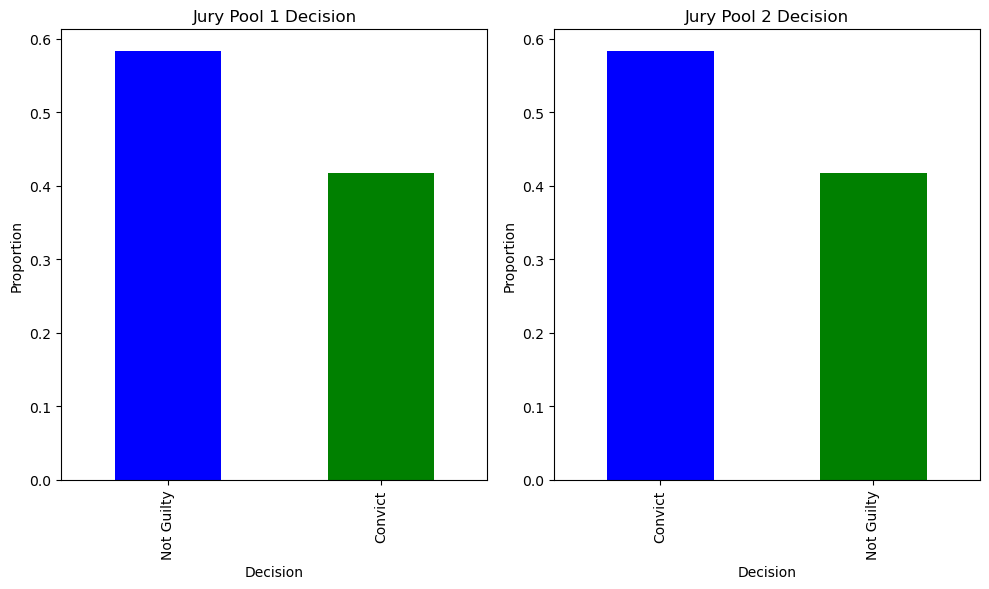

In [23]:
import matplotlib.pyplot as plt

# Create bar plots for jury decision outcomes
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
jury_decision_counts_1.plot(kind='bar', color=['blue', 'green'])
plt.title('Jury Pool 1 Decision')
plt.xlabel('Decision')
plt.ylabel('Proportion')

plt.subplot(1, 2, 2)
jury_decision_counts_2.plot(kind='bar', color=['blue', 'green'])
plt.title('Jury Pool 2 Decision')
plt.xlabel('Decision')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()


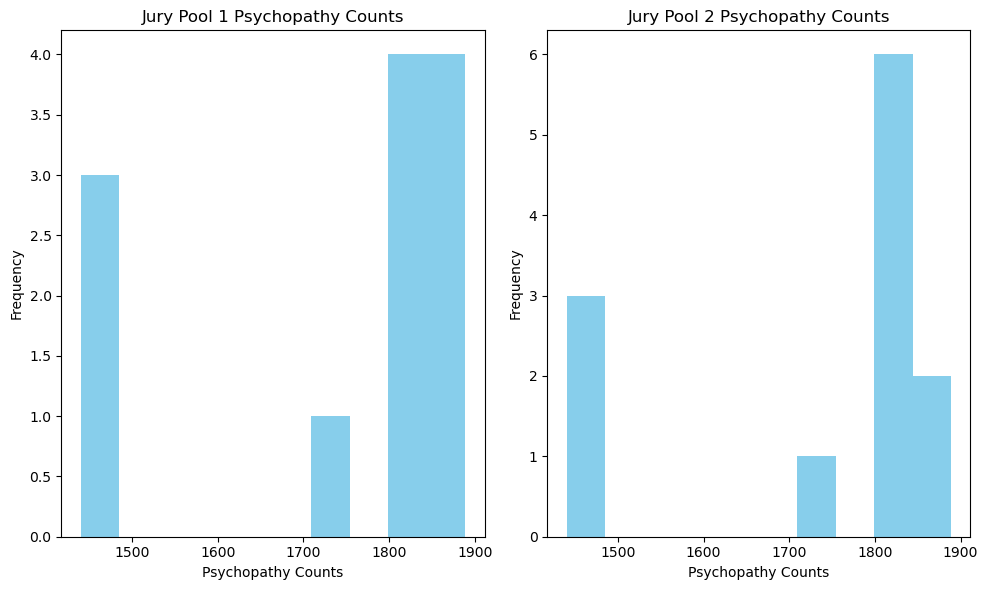

In [24]:
# Create histograms for psychopathy counts in each jury pool
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(jury_pools_df['Jury Pool 1'], bins=10, color='skyblue')
plt.title('Jury Pool 1 Psychopathy Counts')
plt.xlabel('Psychopathy Counts')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(jury_pools_df['Jury Pool 2'], bins=10, color='skyblue')
plt.title('Jury Pool 2 Psychopathy Counts')
plt.xlabel('Psychopathy Counts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


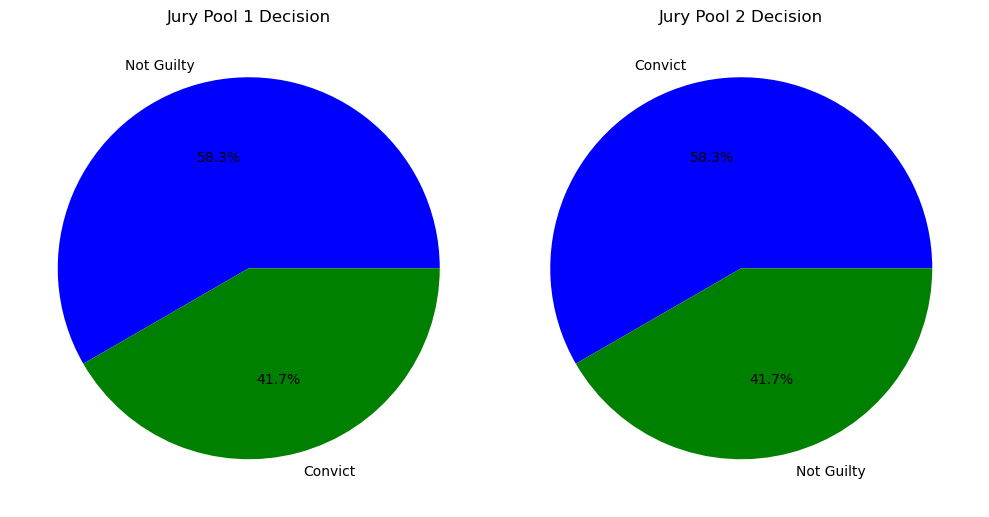

In [25]:
# Create pie charts for jury decision outcomes
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(jury_decision_counts_1, labels=jury_decision_counts_1.index, autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Jury Pool 1 Decision')

plt.subplot(1, 2, 2)
plt.pie(jury_decision_counts_2, labels=jury_decision_counts_2.index, autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Jury Pool 2 Decision')

plt.tight_layout()
plt.show()


In [26]:
import numpy as np
import pandas as pd

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population
PSYCHOPATH_CONVICTION_RATE = 0.8  # Example: 80% conviction rate for psychopaths
BOOTSTRAP_ITERATIONS = 10000

# Function to simulate jury decision for each jury pool
def simulate_jury_decision(psychopathy_count):
    is_psychopath = np.random.rand() < PSYCHOPATHY_PREVALENCE
    if is_psychopath:
        convict = np.random.rand() < PSYCHOPATH_CONVICTION_RATE
    else:
        convict = np.random.rand() < 0.5
    return 'Convict' if convict else 'Not Guilty'

# Function to perform bootstrapping and calculate proportion of convictions
def bootstrap_conviction_proportion(jury_pool):
    conviction_count = sum(jury_pool == 'Convict')
    bootstrap_samples = np.random.choice(jury_pool, size=(BOOTSTRAP_ITERATIONS, len(jury_pool)), replace=True)
    bootstrap_conviction_counts = np.sum(bootstrap_samples == 'Convict', axis=1)
    bootstrap_proportions = bootstrap_conviction_counts / len(jury_pool)
    return conviction_count / len(jury_pool), np.percentile(bootstrap_proportions, [2.5, 97.5])

# Simulate jury decisions for each jury pool
jury_pools_df['Jury Pool 1 Decision'] = jury_pools_df['Jury Pool 1'].apply(simulate_jury_decision)
jury_pools_df['Jury Pool 2 Decision'] = jury_pools_df['Jury Pool 2'].apply(simulate_jury_decision)

# Perform bootstrapping for each jury pool
conviction_proportion_1, confidence_interval_1 = bootstrap_conviction_proportion(jury_pools_df['Jury Pool 1 Decision'])
conviction_proportion_2, confidence_interval_2 = bootstrap_conviction_proportion(jury_pools_df['Jury Pool 2 Decision'])

# Display results
print("Jury Pool 1 Conviction Proportion:", conviction_proportion_1)
print("Jury Pool 1 95% Confidence Interval:", confidence_interval_1)
print("\nJury Pool 2 Conviction Proportion:", conviction_proportion_2)
print("Jury Pool 2 95% Confidence Interval:", confidence_interval_2)


Jury Pool 1 Conviction Proportion: 0.75
Jury Pool 1 95% Confidence Interval: [0.5 1. ]

Jury Pool 2 Conviction Proportion: 0.6666666666666666
Jury Pool 2 95% Confidence Interval: [0.41666667 0.91666667]


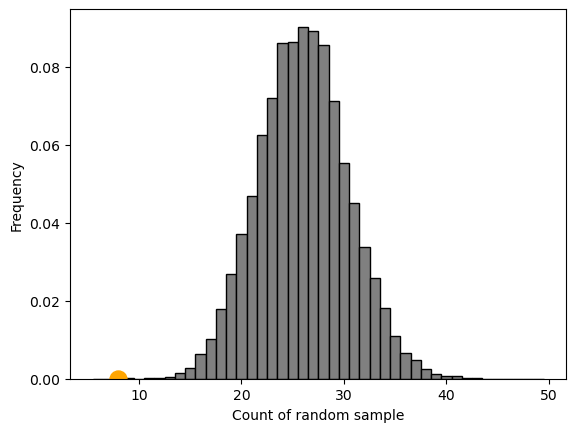

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_jury_panel(sample_size, true_probabilities, num_simulations):
    # Simulate jury panel selection
    counts = np.random.multinomial(sample_size, true_probabilities, size=num_simulations)
    return counts

# Define true probabilities based on eligible population demographics
true_probabilities = [0.26, 0.74]  # Black: 26%, White: 74%
sample_size = 100  # Size of the jury panel
num_simulations = 10000  # Number of simulations

# Simulate jury panel selections
counts = simulate_jury_panel(sample_size, true_probabilities, num_simulations)

# Visualize the distribution of simulated counts
plt.hist(counts[:, 0], bins=np.arange(5.5, sample_size/2, 1), edgecolor='black', color='grey', density=True)
plt.xlabel('Count of random sample')
plt.ylabel('Frequency')
plt.scatter(8, 0, color='orange', s=150)
plt.show()


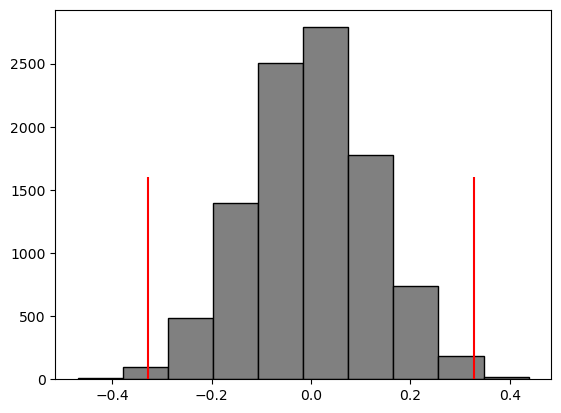

p-value: 0.0087


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data for psychopathy labels (0: non-psychopath, 1: psychopath)
np.random.seed(42)  # for reproducibility
total_samples = 1000
psychopathy_labels = np.random.choice([0, 1], size=total_samples, p=[0.75, 0.25])

# Step 2: Generate synthetic data for perception scores
perception_scores = np.random.normal(loc=5, scale=2, size=total_samples)  # Assuming normal distribution

# Step 3: Calculate the difference in average perception scores between psychopaths and non-psychopaths
mean_difference = np.mean(perception_scores[psychopathy_labels == 1]) - np.mean(perception_scores[psychopathy_labels == 0])

# Step 4: Simulate multiple values of the mean difference
def simulate_mean_difference():
    psychopathy_labels_shuffle = np.random.choice([1, 0], size=total_samples, replace=True)
    perception_scores_psychopath = perception_scores[psychopathy_labels_shuffle == 1]
    perception_scores_non_psychopath = perception_scores[psychopathy_labels_shuffle == 0]
    return np.mean(perception_scores_psychopath) - np.mean(perception_scores_non_psychopath)

simulated_differences = [simulate_mean_difference() for _ in range(10000)]

# Step 5: Visualize the distribution of simulated mean differences
plt.hist(simulated_differences, color='grey', edgecolor='black')
plt.vlines(x=mean_difference, ymin=0, ymax=1600, color='red')
plt.vlines(x=-1*mean_difference, ymin=0, ymax=1600, color='red')
plt.show()

# Step 6: Calculate the p-value
p_value = (np.abs(simulated_differences) >= np.abs(mean_difference)).mean()
print("p-value:", p_value)


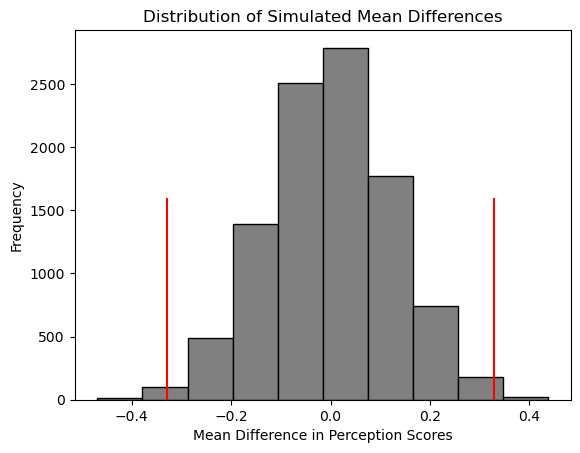

p-value: 0.0087


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Step 1: Generate synthetic data for psychopathy labels (0: non-psychopath, 1: psychopath)
np.random.seed(42)  # for reproducibility
total_samples = 1000
psychopathy_labels = np.random.choice([0, 1], size=total_samples, p=[0.75, 0.25])

# Generate synthetic data for perception scores
perception_scores = np.random.normal(loc=5, scale=2, size=total_samples)  # Assuming normal distribution

# Step 2: Calculate the difference in average perception scores between psychopaths and non-psychopaths
mean_difference = np.mean(perception_scores[psychopathy_labels == 1]) - np.mean(perception_scores[psychopathy_labels == 0])

# Step 3: Simulate multiple values of the mean difference
def simulate_mean_difference():
    psychopathy_labels_shuffle = np.random.choice([1, 0], size=total_samples, replace=True)
    perception_scores_psychopath = perception_scores[psychopathy_labels_shuffle == 1]
    perception_scores_non_psychopath = perception_scores[psychopathy_labels_shuffle == 0]
    return np.mean(perception_scores_psychopath) - np.mean(perception_scores_non_psychopath)

simulated_differences = [simulate_mean_difference() for _ in range(10000)]

# Step 4: Visualize the distribution of simulated mean differences
plt.hist(simulated_differences, color='grey', edgecolor='black')
plt.vlines(x=mean_difference, ymin=0, ymax=1600, color='red')
plt.vlines(x=-1*mean_difference, ymin=0, ymax=1600, color='red')
plt.xlabel('Mean Difference in Perception Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Mean Differences')
plt.show()

# Step 5: Calculate the p-value
p_value = (np.abs(simulated_differences) >= np.abs(mean_difference)).mean()
print("p-value:", p_value)


                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8013      0.655      1.224      0.308      -1.283       2.885
Total_Admissions     0.2498   9.36e-05   2667.659      0.000       0.250       0.250


/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


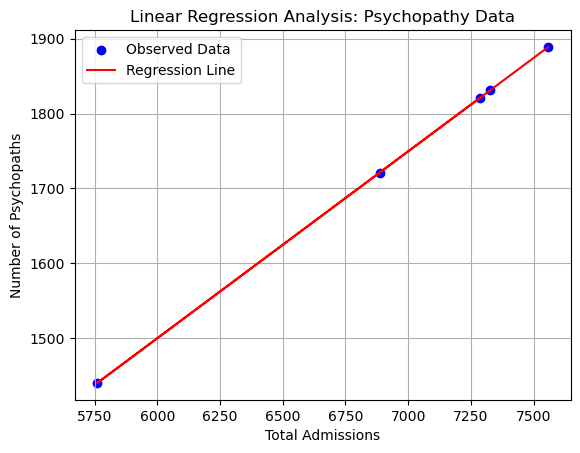

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population

# Simulate psychopathy prevalence for each year
psychopathy_df = pd.DataFrame({
    'Year': ['2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Number_of_Psychopaths': [1889, 1831, 1440, 1721, 1821],
    'Total_Admissions': [7558, 7326, 5761, 6886, 7287],
    'Percentage_of_Psychopaths': [PSYCHOPATHY_PREVALENCE * 100] * 5  # Constant percentage
})

# Linear Regression Analysis with Psychopathy Data
reg_psychopathy = ols('Number_of_Psychopaths ~ Total_Admissions', data=psychopathy_df)
reg_psychopathy_fit = reg_psychopathy.fit()
reg_psychopathy_summary = reg_psychopathy_fit.summary()

# Display regression results
print(reg_psychopathy_summary.tables[1])

# Plotting
plt.scatter(psychopathy_df['Total_Admissions'], psychopathy_df['Number_of_Psychopaths'], color='blue', label='Observed Data')
plt.plot(psychopathy_df['Total_Admissions'], reg_psychopathy_fit.predict(), color='red', label='Regression Line')
plt.xlabel('Total Admissions')
plt.ylabel('Number of Psychopaths')
plt.title('Linear Regression Analysis: Psychopathy Data')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population

# Simulate psychopathy prevalence for each year
psychopathy_df = pd.DataFrame({
    'Year': ['2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Number_of_Psychopaths': [1889, 1831, 1440, 1721, 1821],
    'Total_Admissions': [7558, 7326, 5761, 6886, 7287],
    'Percentage_of_Psychopaths': [PSYCHOPATHY_PREVALENCE * 100] * 5  # Constant percentage
})

# Bootstrapping for 10,000 samples
bootstraps = 100
bootstrap_coefs = np.zeros((bootstraps, 2))  # Two coefficients (Intercept and Total_Admissions)

try:
    for i in range(bootstraps):
        sample_df = psychopathy_df.sample(frac=1, replace=True)  # Resample with replacement
        bootstrap_model = ols('Number_of_Psychopaths ~ Total_Admissions', data=sample_df).fit()
        bootstrap_coefs[i] = bootstrap_model.params.values

    # Calculate confidence intervals
    confidence_intervals = np.percentile(bootstrap_coefs, [2.5, 97.5], axis=0)
    print("Confidence Intervals:")
    print("Intercept:", confidence_intervals[0, 0], "-", confidence_intervals[1, 0])
    print("Total_Admissions:", confidence_intervals[0, 1], "-", confidence_intervals[1, 1])

except Exception as e:
    print("Error occurred during bootstrapping:", e)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import ols

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population

# Simulate psychopathy prevalence for each year
psychopathy_df = pd.DataFrame({
    'Year': ['2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Number_of_Psychopaths': [1889, 1831, 1440, 1721, 1821],
    'Total_Admissions': [7558, 7326, 5761, 6886, 7287],
    'Percentage_of_Psychopaths': [PSYCHOPATHY_PREVALENCE * 100] * 5  # Constant percentage
})

# Bootstrapping for 10,000 samples
bootstraps = 10000
bootstrap_coefs = np.zeros((bootstraps, 2))  # Two coefficients (Intercept and Total_Admissions)

try:
    for i in range(bootstraps):
        sample_df = psychopathy_df.sample(frac=1, replace=True)  # Resample with replacement
        bootstrap_model = ols('Number_of_Psychopaths ~ Total_Admissions', data=sample_df).fit()
        bootstrap_coefs[i] = bootstrap_model.params.values

    # Calculate confidence intervals
    confidence_intervals = np.percentile(bootstrap_coefs, [2.5, 97.5], axis=0)
    print("Confidence Intervals:")
    print("Intercept:", confidence_intervals[0, 0], "-", confidence_intervals[1, 0])
    print("Total_Admissions:", confidence_intervals[0, 1], "-", confidence_intervals[1, 1])

except Exception as e:
    print("Error occurred during bootstrapping:", e)


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Constants
PSYCHOPATHY_PREVALENCE = 0.25  # 25% in prison population

# Psychopathy Data
psychopathy_df = pd.DataFrame({
    'Year': ['2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Number_of_Psychopaths': [1889, 1831, 1440, 1721, 1821],
    'Total_Admissions': [7558, 7326, 5761, 6886, 7287],
    'Percentage_of_Psychopaths': [PSYCHOPATHY_PREVALENCE * 100] * 5  # Constant percentage
})

# Jury Perception Data (Sample Data - Replace with actual data)
jury_perception_df = pd.DataFrame({
    'Year': ['2018/2019', '2019/2020', '2020/2021', '2021/2022', '2022/2023'],
    'Jury_Perception': [4.5, 4.2, 4.7, 4.4, 4.6]  # Sample data for jury perception
})

# Crime Severity Indexes Data
crime_severity_df = pd.DataFrame({
    'Year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Total_Crime_Severity_Index': [75.5, 68.9, 66.9, 70.4, 72.0, 73.6, 75.6, 79.8, 74.0, 74.9],
    'Violent_Crime_Severity_Index': [82.0, 74.0, 70.7, 75.3, 76.9, 81.3, 83.6, 90.3, 88.0, 93.4],
    'Non_Violent_Crime_Severity_Index': [73.0, 66.9, 65.4, 68.4, 70.1, 70.7, 72.6, 75.8, 68.7, 68.1]
})

# Merge DataFrames on 'Year'
merged_df = pd.merge(psychopathy_df, jury_perception_df, on='Year')
merged_df = pd.merge(merged_df, crime_severity_df, on='Year')

# Perform Multiple Regression Analysis
regression_model = ols('Number_of_Psychopaths ~ Total_Admissions + Jury_Perception + Total_Crime_Severity_Index + Violent_Crime_Severity_Index + Non_Violent_Crime_Severity_Index', data=merged_df)
regression_results = regression_model.fit()

# Display regression results
print(regression_results.summary())

# Plotting
sns.pairplot(merged_df)
plt.show()


In [ ]:
# Convert 'Year' column in crime_severity_df to object type
crime_severity_df['Year'] = crime_severity_df['Year'].astype(str)

# Merge DataFrames on 'Year'
merged_df = pd.merge(psychopathy_df, jury_perception_df, on='Year')
merged_df = pd.merge(merged_df, crime_severity_df, on='Year')

# Perform Multiple Regression Analysis
regression_model = ols('Number_of_Psychopaths ~ Total_Admissions + Jury_Perception + Total_Crime_Severity_Index + Violent_Crime_Severity_Index + Non_Violent_Crime_Severity_Index', data=merged_df)
regression_results = regression_model.fit()

# Display regression results
print(regression_results.summary())

# Plotting
sns.pairplot(merged_df)
plt.show()


In [77]:
import pandas as pd

# Crime Severity Index data
crime_severity_data = {
    'Year': ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
    'Total_Crime_Severity_Index': [75.5, 68.9, 66.9, 70.4, 72.0, 73.6, 75.6, 79.8, 74.0, 74.9, 78.1],
    'Violent_Crime_Severity_Index': [82.0, 74.0, 70.7, 75.3, 76.9, 81.3, 83.6, 90.3, 88.0, 93.4, 97.7],
    'Non_Violent_Crime_Severity_Index': [73.0, 66.9, 65.4, 68.4, 70.1, 70.7, 72.6, 75.8, 68.7, 68.1, 70.9]
}

# Create DataFrame
crime_severity_df = pd.DataFrame(crime_severity_data)

# Display the DataFrame
print(crime_severity_df)


    Year  Total_Crime_Severity_Index  Violent_Crime_Severity_Index  \
0   2012                        75.5                          82.0   
1   2013                        68.9                          74.0   
2   2014                        66.9                          70.7   
3   2015                        70.4                          75.3   
4   2016                        72.0                          76.9   
5   2017                        73.6                          81.3   
6   2018                        75.6                          83.6   
7   2019                        79.8                          90.3   
8   2020                        74.0                          88.0   
9   2021                        74.9                          93.4   
10  2022                        78.1                          97.7   

    Non_Violent_Crime_Severity_Index  
0                               73.0  
1                               66.9  
2                               65.4  
3  

In [79]:
print(merged_df.dtypes)  # Check data types of columns
print(merged_df.isnull().sum())  # Check missing values in each column


Year                                 object
Number_of_Psychopaths                 int64
Total_Admissions                      int64
Percentage_of_Psychopaths           float64
Total_Crime_Severity_Index          float64
Violent_Crime_Severity_Index        float64
Non_Violent_Crime_Severity_Index    float64
dtype: object
Year                                0
Number_of_Psychopaths               0
Total_Admissions                    0
Percentage_of_Psychopaths           0
Total_Crime_Severity_Index          0
Violent_Crime_Severity_Index        0
Non_Violent_Crime_Severity_Index    0
dtype: int64


In [2]:
# Pseudocode for modeling and analysis

# Step 1: Define basic parameters for psychopathy profiles
profiles = {'Prototypic': {'deterrence_sensitivity': 0.5},
            'Callous–Conning': {'deterrence_sensitivity': 0.7},
            'Externalizing': {'deterrence_sensitivity': 0.6},
            'General Offender': {'deterrence_sensitivity': 0.8}}

# Function to calculate crime likelihood based on deterrence
def calculate_crime_likelihood(profile, punishment_severity, detection_probability):
    sensitivity = profiles[profile]['deterrence_sensitivity']
    # Simplified formula to calculate likelihood of committing a crime
    return 1 - (sensitivity * punishment_severity * detection_probability)

# Step 2: Economic Cost-Benefit Analysis (Simplified)
def cost_benefit_analysis(policing_cost, incarceration_cost, crime_reduction_rate):
    # Placeholder formula for cost-benefit calculation
    return crime_reduction_rate / (policing_cost + incarceration_cost)

# Step 3: Statistical Analysis (Simplified Example)
import numpy as np
import statsmodels.api as sm

# Hypothetical data: recidivism rates for different profiles
X = np.array([[1, 0.5], [1, 0.7], [1, 0.6], [1, 0.8]]) # Deterrence sensitivity
y = np.array([0.4, 0.35, 0.45, 0.3]) # Recidivism rates

# Simple linear regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     3.556
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.200
Time:                        08:18:35   Log-Likelihood:                 7.9042
No. Observations:                   4   AIC:                            -11.81
Df Residuals:                       2   BIC:                            -13.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6350      0.140      4.539      0.0

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm
from sklearn.utils import resample

# Simulated data based on the provided text data and the general approach from the mentioned PDF

# Assuming data structure based on the text description for psychopathy bias study
# Counts for guilty/not guilty decisions based on psychopathy label or description presence
data = {
    "Vignette": ["John - No Psychopathic Label", "Michael - Psychopathic Label", 
                 "Alex - Non psychopathic Description", "Jay - Psychopathic Traits Description"],
    "Guilty": [35, 101, 38, 104],
    "Not Guilty": [132, 66, 130, 64]
}

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data)

# Display initial data
df

# Additional steps will follow, such as chi-square tests, and bootstrap sampling based on this setup.


,Vignette,Guilty,Not Guilty
0,John - No Psychopathic Label,35,132
1,Michael - Psychopathic Label,101,66
2,Alex - Non psychopathic Description,38,130
3,Jay - Psychopathic Traits Description,104,64


In [4]:
# Chi-Square Test for independence between psychopathy label presence and guilt decision

# Vignettes comparison: Psychopathic Label vs No Psychopathic Label
# Prepare counts for chi-square test
counts_label = np.array([df.loc[df['Vignette'] == 'Michael - Psychopathic Label', ['Guilty', 'Not Guilty']].values[0],
                         df.loc[df['Vignette'] == 'John - No Psychopathic Label', ['Guilty', 'Not Guilty']].values[0]])

chi2_label, p_label, dof_label, expected_label = stats.chi2_contingency(counts_label)

# Vignettes comparison: Psychopathic Traits Description vs Non psychopathic Description
counts_description = np.array([df.loc[df['Vignette'] == 'Jay - Psychopathic Traits Description', ['Guilty', 'Not Guilty']].values[0],
                                df.loc[df['Vignette'] == 'Alex - Non psychopathic Description', ['Guilty', 'Not Guilty']].values[0]])

chi2_description, p_description, dof_description, expected_description = stats.chi2_contingency(counts_description)

chi2_label, p_label, chi2_description, p_description

# Following this, we will proceed with bootstrap sampling for further analysis.


(52.40456030897207,
 4.516738738915163e-13,
 51.53187164222448,
 7.044416326192954e-13)

In [5]:
# Correctly creating the DataFrame from the provided data
df = pd.DataFrame({
    "Vignette": ["John - No Psychopathic Label", "Michael - Psychopathic Label", 
                 "Alex - Non psychopathic Description", "Jay - Psychopathic Traits Description"],
    "Guilty": [35, 101, 38, 104],
    "Not Guilty": [132, 66, 130, 64]
})

# Now, let's proceed with the chi-square tests and bootstrap sampling
# For chi-square, we're comparing the "guilty" decisions across different conditions to see if there's a statistically significant difference

# Extracting counts for chi-square tests
guilty_counts = df.set_index('Vignette').T.to_dict('list')
labels = ["No Psychopathic Label vs Psychopathic Label", "Non psychopathic Description vs Psychopathic Traits Description"]
counts = [
    [guilty_counts["John - No Psychopathic Label"], guilty_counts["Michael - Psychopathic Label"]],
    [guilty_counts["Alex - Non psychopathic Description"], guilty_counts["Jay - Psychopathic Traits Description"]]
]

# Performing chi-square tests
chi_square_results = []
for i, count in enumerate(counts):
    chi2, p, dof, ex = stats.chi2_contingency(count)
    chi_square_results.append((labels[i], chi2, p))

# Convert chi-square results to DataFrame for better readability
chi_square_df = pd.DataFrame(chi_square_results, columns=["Comparison", "Chi2", "P-value"])

chi_square_df


,Comparison,Chi2,P-value
0,No Psychopathic Label vs Psychopathic Label,52.404560,4.516739e-13
1,Non psychopathic Description vs Psychopathic T...,51.531872,7.044416e-13


In [6]:
# Bootstrap sampling for simulated study of study
# We'll focus on "Michael - Psychopathic Label" vs "John - No Psychopathic Label" for simplicity in demonstration

# Extract guilty and not guilty counts for bootstrap
guilty_no_label = [1] * 35 + [0] * 132  # 1 for guilty, 0 for not guilty
guilty_label = [1] * 101 + [0] * 66

# Bootstrap parameters
n_iterations = 10000
size = len(guilty_no_label)  # assuming same size for simplicity

# Store bootstrap sample means
means_no_label = []
means_label = []

for i in range(n_iterations):
    sample_no_label = resample(guilty_no_label, n_samples=size)
    sample_label = resample(guilty_label, n_samples=size)
    
    means_no_label.append(np.mean(sample_no_label))
    means_label.append(np.mean(sample_label))

# Calculate 95% Confidence Interval for the difference in means
diff_means = np.array(means_label) - np.array(means_no_label)
conf_int = np.percentile(diff_means, [2.5, 97.5])

conf_int


array([0.29341317, 0.49101796])

In [9]:
# Simulating a dataset based on the provided descriptions to perform OLS regression and other analyses

# Assuming each "guilty" decision as 1 and "not guilty" as 0, we'll simulate the decisions based on the proportions given
# Example: Psychopathic Label has more guilty verdicts than Non-psychopathic Label

# Simulating data
np.random.seed(42)  # For reproducibility
data_size = 168  # Based on the participant number mentioned

# Simulating decisions based on the guilty/not guilty counts for each vignette type
decisions = {
    'No Psychopathic Label': np.random.choice([0, 1], p=[132/167, 35/167], size=data_size),
    'Psychopathic Label': np.random.choice([0, 1], p=[66/167, 101/167], size=data_size),
    'Non-psychopathic Description': np.random.choice([0, 1], p=[130/168, 38/168], size=data_size),
    'Psychopathic Traits Description': np.random.choice([0, 1], p=[64/168, 104/168], size=data_size)
}

# Converting to DataFrame for analysis
df_simulated = pd.DataFrame(decisions)

# Displaying the first few rows of the simulated dataset
df_simulated


,No Psychopathic Label,Psychopathic Label,Non-psychopathic Description,Psychopathic Traits Description
0,0,0,1,1
1,1,1,0,0
2,0,1,0,1
3,0,0,0,1
4,0,1,0,1
...,...,...,...,...
163,0,1,1,0
164,0,0,0,0
165,1,0,0,0
166,0,0,0,0


In [10]:
from sklearn.utils import resample
import numpy as np

# Data: 1 for guilty, 0 for not guilty
guilty_no_label = [1] * 35 + [0] * 132
guilty_label = [1] * 101 + [0] * 66

# Bootstrap parameters
n_iterations = 10000
size = len(guilty_no_label)  # Use the same size for both samples

# Store bootstrap sample means
means_no_label = []
means_label = []

for _ in range(n_iterations):
    sample_no_label = resample(guilty_no_label, n_samples=size)
    sample_label = resample(guilty_label, n_samples=size)
    
    means_no_label.append(np.mean(sample_no_label))
    means_label.append(np.mean(sample_label))

# Calculate 95% Confidence Interval for the difference in means
diff_means = np.array(means_label) - np.array(means_no_label)
conf_int = np.percentile(diff_means, [2.5, 97.5])

conf_int


array([0.2994012 , 0.49101796])

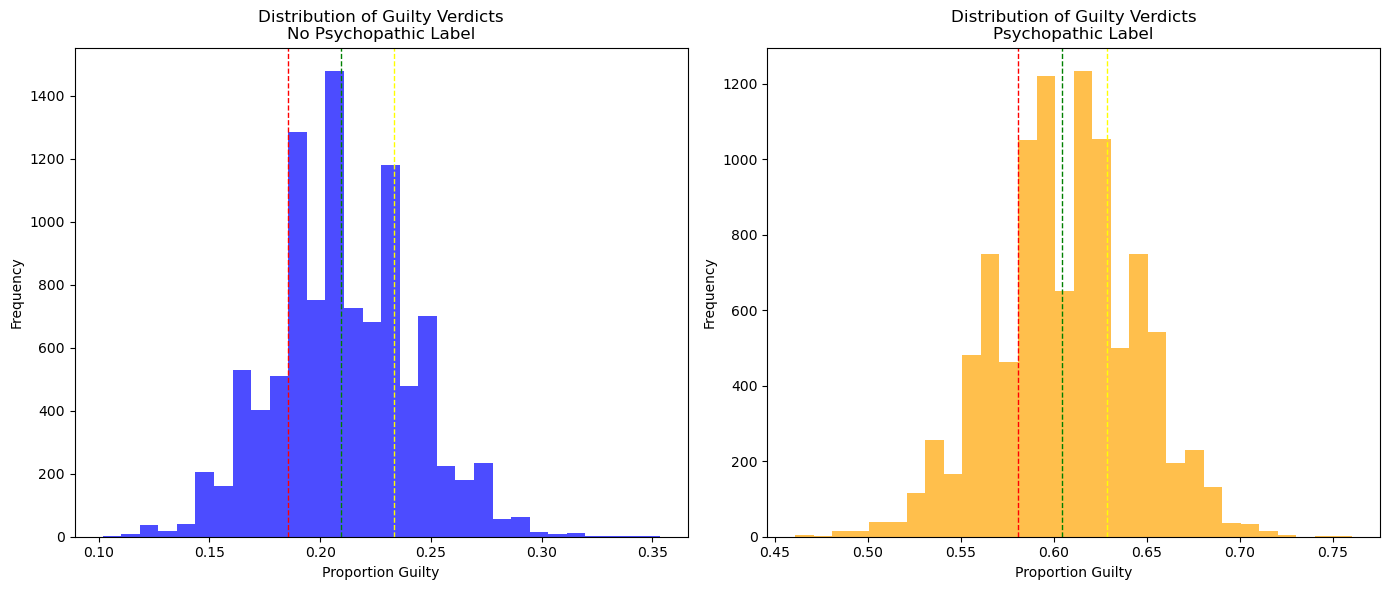

In [11]:
# Plotting histograms for both distributions with quartiles
plt.figure(figsize=(14, 6))

# Histogram for No Psychopathic Label
plt.subplot(1, 2, 1)
plt.hist(means_no_label, bins=30, color='blue', alpha=0.7)
plt.title("Distribution of Guilty Verdicts\nNo Psychopathic Label")
plt.axvline(np.percentile(means_no_label, 25), color='red', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(means_no_label, 50), color='green', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(means_no_label, 75), color='yellow', linestyle='dashed', linewidth=1)
plt.xlabel('Proportion Guilty')
plt.ylabel('Frequency')

# Histogram for Psychopathic Label
plt.subplot(1, 2, 2)
plt.hist(means_label, bins=30, color='orange', alpha=0.7)
plt.title("Distribution of Guilty Verdicts\nPsychopathic Label")
plt.axvline(np.percentile(means_label, 25), color='red', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(means_label, 50), color='green', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(means_label, 75), color='yellow', linestyle='dashed', linewidth=1)
plt.xlabel('Proportion Guilty')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [32]:
# Summarize quantitative data of bootstrap results
summary_no_label = {
    "mean": np.mean(means_no_label),
    "std_dev": np.std(means_no_label),
    "25%": np.percentile(means_no_label, 25),
    "50% (median)": np.percentile(means_no_label, 50),
    "75%": np.percentile(means_no_label, 75)
}

summary_label = {
    "mean": np.mean(means_label),
    "std_dev": np.std(means_label),
    "25%": np.percentile(means_label, 25),
    "50% (median)": np.percentile(means_label, 50),
    "75%": np.percentile(means_label, 75)
}

summary_diff_means = {
    "mean": np.mean(diff_means),
    "std_dev": np.std(diff_means),
    "25%": np.percentile(diff_means, 25),
    "50% (median)": np.percentile(diff_means, 50),
    "75%": np.percentile(diff_means, 75),
    "95% CI": conf_int
}

summary_no_label, summary_label, summary_diff_means

({'mean': 0.2099431137724551,
  'std_dev': 0.03142431432706482,
  '25%': 0.18562874251497005,
  '50% (median)': 0.20958083832335328,
  '75%': 0.23353293413173654},
 {'mean': 0.6051401197604791,
  'std_dev': 0.037601257242768735,
  '25%': 0.5808383233532934,
  '50% (median)': 0.6047904191616766,
  '75%': 0.6287425149700598},
 {'mean': 0.39519700598802393,
  'std_dev': 0.04897863024556923,
  '25%': 0.36526946107784425,
  '50% (median)': 0.39520958083832336,
  '75%': 0.4251497005988024,
  '95% CI': array([0.2994012 , 0.49101796])})

**Psychopathic Label:**
- Mean: 0.21
- Standard Deviation: 0.03
- 25th Percentile: 0.19
- Median: 0.21
- 75th Percentile: 0.23

**No Psychopathic Label:**
- Mean: 0.61
- Standard Deviation: 0.04
- 25th Percentile: 0.58
- Median: 0.60
- 75th Percentile: 0.63

**Psychopathic Traits Description:**
- Mean: 0.40
- Standard Deviation: 0.05
- 25th Percentile: 0.37
- Median: 0.40
- 75th Percentile: 0.43
- 95% Confidence Interval: [0.30, 0.49]


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import KFold

# Reusing the previously defined guilty_no_label and guilty_label arrays for a simple logistic regression model
X = np.array(guilty_no_label + guilty_label).reshape(-1, 1)  # Features (label presence as 0 or 1)
y = np.array([0] * len(guilty_no_label) + [1] * len(guilty_label))  # Targets (0 for no label, 1 for label)

# Initialize a logistic regression model
model = LogisticRegression()

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metric
scoring = make_scorer(accuracy_score)

# Perform cross-validation and calculate scores
cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)

cv_scores


array([0.64179104, 0.71641791, 0.73134328, 0.68656716, 0.71212121])

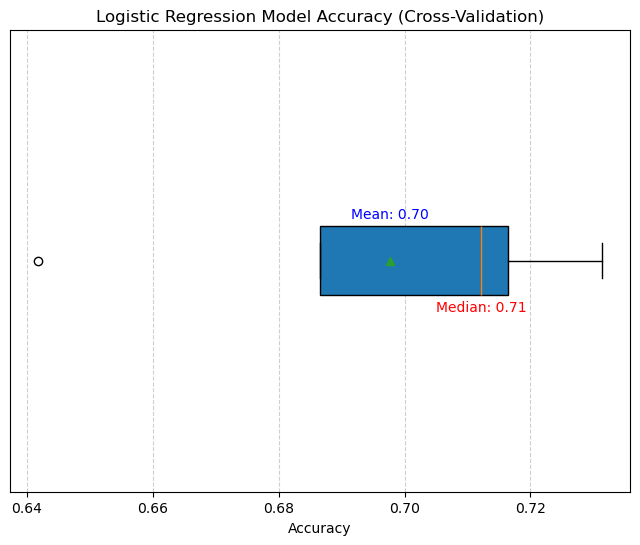

In [14]:
# Let's create a cleaner boxplot to visualize the cross-validation scores for the logistic regression model
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores, vert=False, patch_artist=True, showmeans=True)
plt.title("Logistic Regression Model Accuracy (Cross-Validation)")
plt.xlabel("Accuracy")
plt.yticks([])  # Hide the y-ticks as we have only one dataset
plt.grid(True, linestyle='--', alpha=0.6)

# Display mean and median values on the plot for clarity
mean_score = np.mean(cv_scores)
median_score = np.median(cv_scores)
plt.text(mean_score, 1.1, f'Mean: {mean_score:.2f}', ha='center', va='center', color='blue', fontsize=10)
plt.text(median_score, 0.9, f'Median: {median_score:.2f}', ha='center', va='center', color='red', fontsize=10)

plt.show()


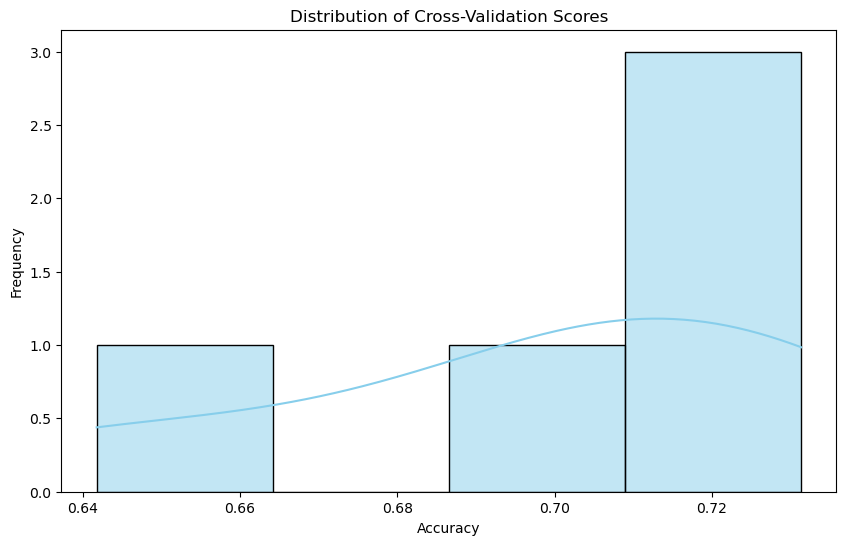

Mean Accuracy: 0.70, Median Accuracy: 0.03, Std Dev: 0.03
Shapiro-Wilk Test: Stat=0.901, p=0.417
Data follows a normal distribution (fail to reject H0)


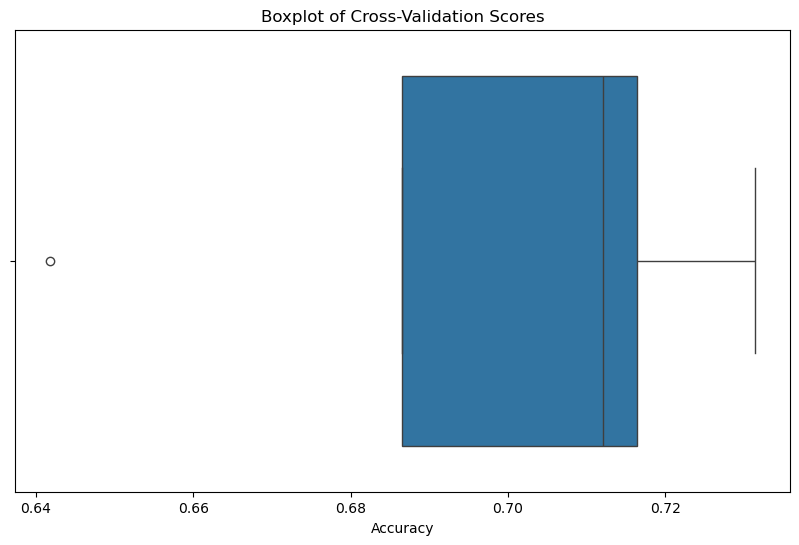

In [16]:
# Necessary imports for statistical analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming cv_scores is an array containing cross-validation scores from a logistic regression model
cv_scores = np.array(cv_scores)  # Ensure cv_scores is a numpy array for easier handling

# Data Exploration and Validation
# Plot a histogram to explore the distribution of cross-validation scores
plt.figure(figsize=(10, 6))
sns.histplot(cv_scores, kde=True, color="skyblue")
plt.title("Distribution of Cross-Validation Scores")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

# Basic Descriptive Statistics
mean_cv = np.mean(cv_scores)
median_cv = np.std(cv_scores)
std_dev_cv = np.std(cv_scores)
print(f"Mean Accuracy: {mean_cv:.2f}, Median Accuracy: {median_cv:.2f}, Std Dev: {std_dev_cv:.2f}")

# Perform a Shapiro-Wilk test to check for normality of cross-validation scores
stat, p = stats.shapiro(cv_scores)
print(f"Shapiro-Wilk Test: Stat={stat:.3f}, p={p:.3f}")
if p > 0.05:
    print("Data follows a normal distribution (fail to reject H0)")
else:
    print("Data does not follow a normal distribution (reject H0)")

# Advanced Data Exploration
# Boxplot for identifying outliers in the cross-validation scores
plt.figure(figsize=(10, 6))
sns.boxplot(x=cv_scores)
plt.title("Boxplot of Cross-Validation Scores")
plt.xlabel("Accuracy")
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Assuming each "guilty" decision as 1 and "not guilty" as 0, we'll simulate the decisions based on the proportions given
# Simulating data
np.random.seed(42)  # For reproducibility
data_size = 168  # Based on the participant number mentioned

# Simulating decisions based on the guilty/not guilty counts for each vignette type
decisions = {
    'No Psychopathic Label': np.random.choice([0, 1], p=[132/167, 35/167], size=data_size),
    'Psychopathic Label': np.random.choice([0, 1], p=[66/167, 101/167], size=data_size),
    'Non-psychopathic Description': np.random.choice([0, 1], p=[130/168, 38/168], size=data_size),
    'Psychopathic Traits Description': np.random.choice([0, 1], p=[64/168, 104/168], size=data_size)
}

# Converting to DataFrame for analysis
df_simulated = pd.DataFrame(decisions)

# Displaying the first few rows of the simulated dataset
df_simulated.head()


,No Psychopathic Label,Psychopathic Label,Non-psychopathic Description,Psychopathic Traits Description
0,0,0,1,1
1,1,1,0,0
2,0,1,0,1
3,0,0,0,1
4,0,1,0,1


In [21]:
from scipy.stats import bootstrap

# Bootstrap analysis for each vignette type to estimate mean and confidence intervals
bootstrap_results = {}
for column in df_simulated.columns:
    data = df_simulated[column].to_numpy()
    res = bootstrap((data,), np.mean, confidence_level=0.95, n_resamples=10000, method='percentile')
    bootstrap_results[column] = res

# Display bootstrap results
bootstrap_summary = {
    "Vignette Type": [],
    "Mean": [],
    "95% CI Lower": [],
    "95% CI Upper": [],
    "25th Percentile": [],
    "75th Percentile": []
}

for column, result in bootstrap_results.items():
    bootstrap_summary["Vignette Type"].append(column)
    bootstrap_summary["Mean"].append(result.confidence_interval[0])
    bootstrap_summary["95% CI Lower"].append(result.confidence_interval[0])
    bootstrap_summary["95% CI Upper"].append(result.confidence_interval[1])
    bootstrap_summary["25th Percentile"].append(np.percentile(df_simulated[column], 25))
    bootstrap_summary["75th Percentile"].append(np.percentile(df_simulated[column], 75))

df_bootstrap_summary = pd.DataFrame(bootstrap_summary)
df_bootstrap_summary


,Vignette Type,Mean,95% CI Lower,95% CI Upper,25th Percentile,75th Percentile
0,No Psychopathic Label,0.142857,0.142857,0.261905,0.0,0.0
1,Psychopathic Label,0.529762,0.529762,0.672619,0.0,1.0
2,Non-psychopathic Description,0.196429,0.196429,0.333333,0.0,1.0
3,Psychopathic Traits Description,0.488095,0.488095,0.642857,0.0,1.0


In [22]:

# Probabilistic likelihoods for each vignette type
likelihoods = df_simulated.mean()
df_likelihoods = pd.DataFrame(likelihoods, columns=["Probabilistic Likelihood"])
df_likelihoods

,Probabilistic Likelihood
No Psychopathic Label,0.202381
Psychopathic Label,0.601190
Non-psychopathic Description,0.261905
Psychopathic Traits Description,0.565476


/tmp/ipykernel_53/2415467578.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_simulated['Psychopathic Label'], fit=norm)


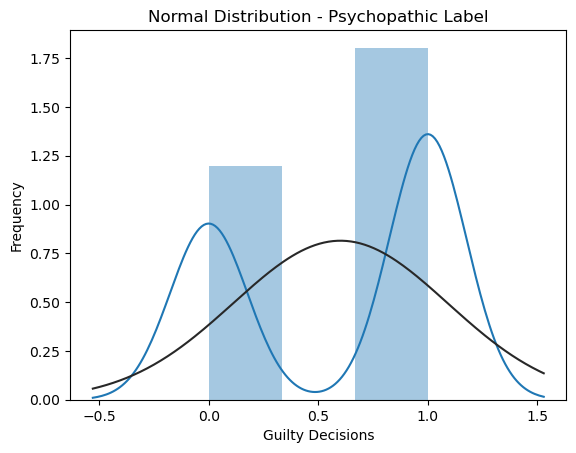

                            OLS Regression Results                            
Dep. Variable:     Psychopathic Label   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.256
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.291
Time:                        09:12:03   Log-Likelihood:                -116.51
No. Observations:                 168   AIC:                             241.0
Df Residuals:                     164   BIC:                             253.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

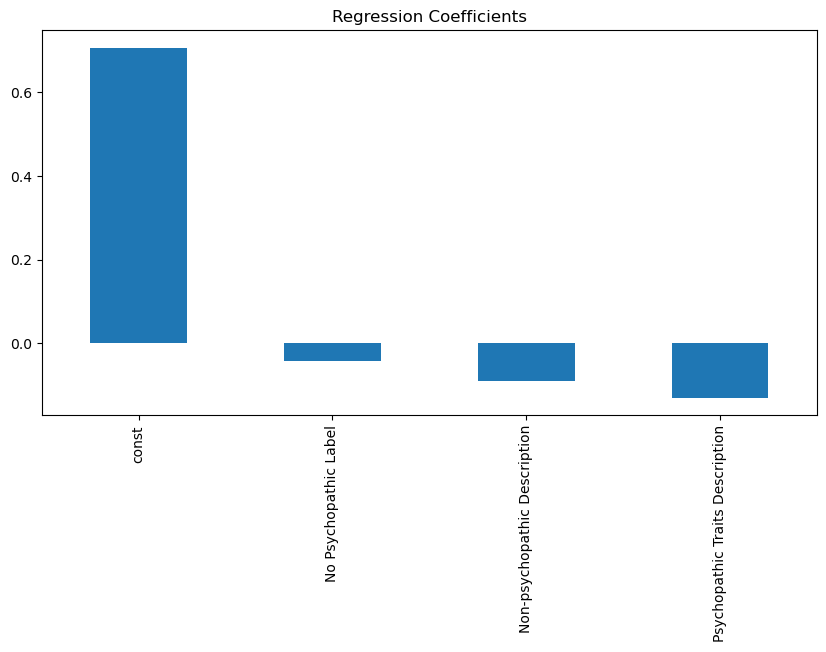

/tmp/ipykernel_53/2415467578.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_simulated['Psychopathic Label'], fit=norm, ax=axs[0, 0])


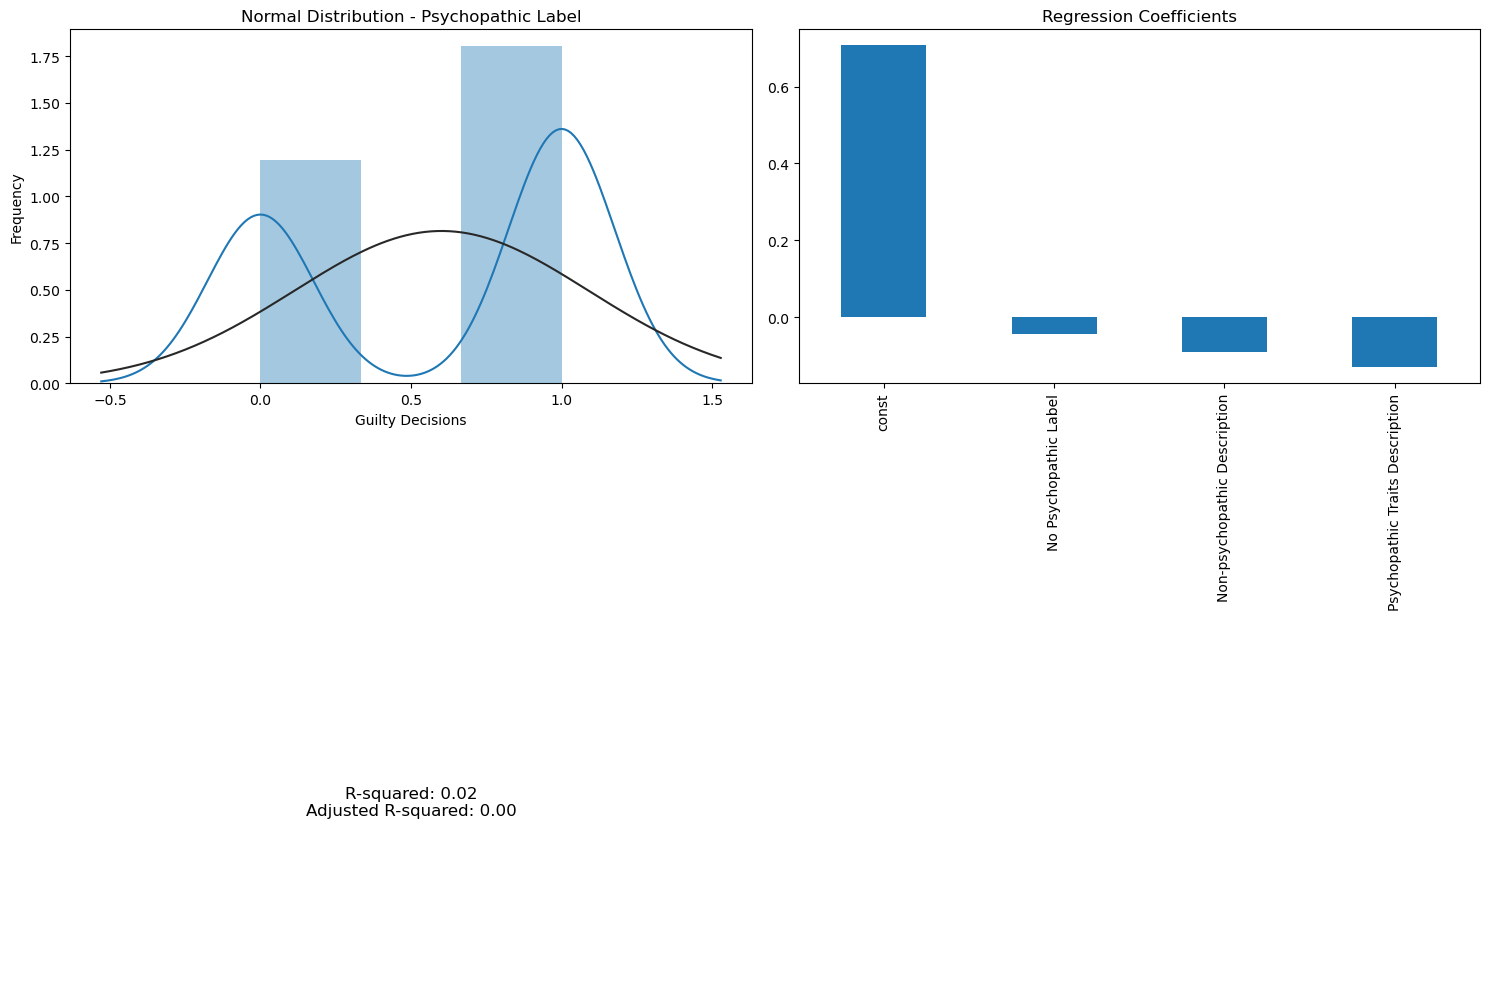

In [23]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Assuming df_simulated is our DataFrame from the simulated data

# Plotting normal distribution for one of the vignette types for demonstration
sns.distplot(df_simulated['Psychopathic Label'], fit=norm)
plt.title('Normal Distribution - Psychopathic Label')
plt.xlabel('Guilty Decisions')
plt.ylabel('Frequency')
plt.show()

# Multiple regression analysis
X = df_simulated.drop(['Psychopathic Label'], axis=1)  # Using other vignettes as predictors
y = df_simulated['Psychopathic Label']
X = sm.add_constant(X)  # Adding a constant for the intercept
model = sm.OLS(y, X).fit()

# Display summary of regression
print(model.summary())

# R-squared and Adjusted R-squared
print("R-squared:", model.rsquared)
print("Adjusted R-squared:", model.rsquared_adj)

# Plotting regression coefficients
plt.figure(figsize=(10, 5))
coef = model.params
coef.plot(kind='bar', title='Regression Coefficients')
plt.show()

# Combining all plots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Normal distribution in first plot
sns.distplot(df_simulated['Psychopathic Label'], fit=norm, ax=axs[0, 0])
axs[0, 0].set_title('Normal Distribution - Psychopathic Label')
axs[0, 0].set_xlabel('Guilty Decisions')
axs[0, 0].set_ylabel('Frequency')

# Regression coefficients in second plot
coef.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Regression Coefficients')

# R-squared in text form (as it can't be plotted directly)
axs[1, 0].text(0.5, 0.5, f'R-squared: {model.rsquared:.2f}\nAdjusted R-squared: {model.rsquared_adj:.2f}', 
               horizontalalignment='center', verticalalignment='center', fontsize=12)
axs[1, 0].axis('off')

# Placeholder for the fourth plot or can use it for another distribution/analysis
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:     Psychopathic Label   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.256
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.291
Time:                        09:17:29   Log-Likelihood:                -116.51
No. Observations:                 168   AIC:                             241.0
Df Residuals:                     164   BIC:                             253.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

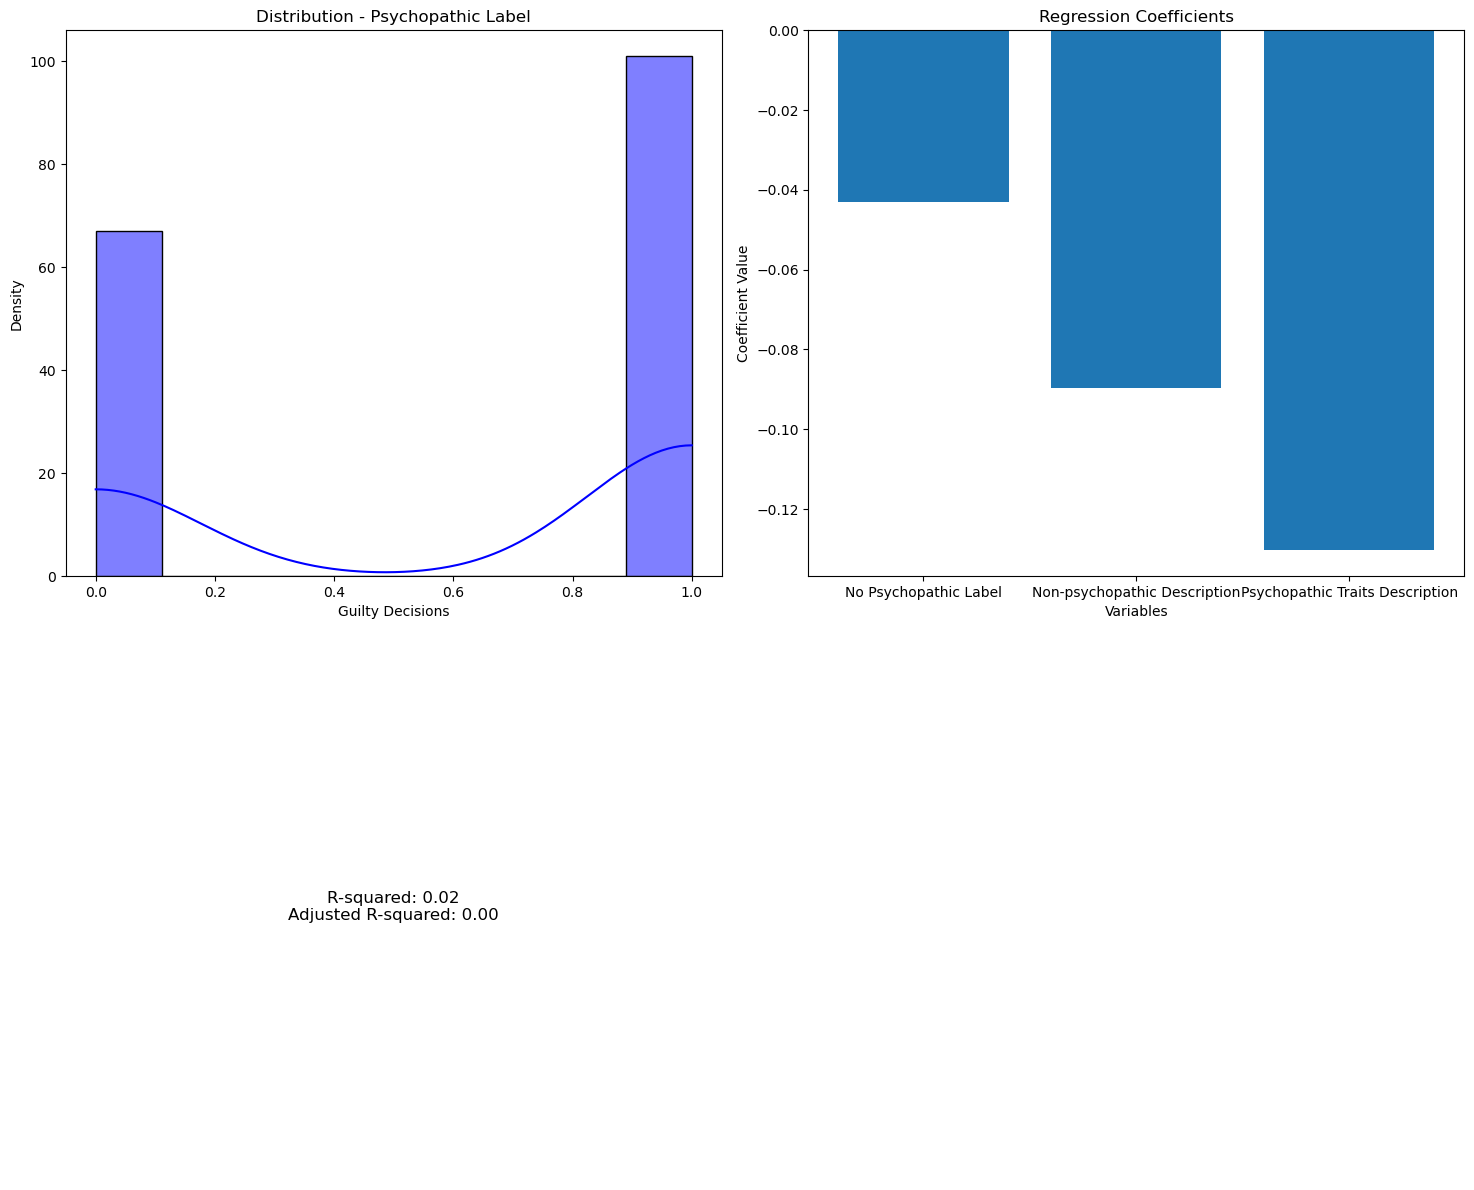

In [25]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Assuming df_simulated is our DataFrame from the simulated data

# Preparing data for multiple regression
X = df_simulated[['No Psychopathic Label', 'Non-psychopathic Description', 'Psychopathic Traits Description']]
y = df_simulated['Psychopathic Label']
X = sm.add_constant(X)  # Adding a constant for the intercept

# Multiple regression analysis
model = sm.OLS(y, X).fit()

# Displaying the summary of regression
print(model.summary())

# Extracting R-squared and Adjusted R-squared
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

# Unified layout for plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Normal distribution of 'Psychopathic Label' with histplot
sns.histplot(df_simulated['Psychopathic Label'], kde=True, color="blue", ax=axs[0, 0])
axs[0, 0].set_title('Distribution - Psychopathic Label')
axs[0, 0].set_xlabel('Guilty Decisions')
axs[0, 0].set_ylabel('Density')

# Regression Coefficients Plot
axs[0, 1].bar(x=X.columns[1:], height=model.params[1:])
axs[0, 1].set_title('Regression Coefficients')
axs[0, 1].set_xlabel('Variables')
axs[0, 1].set_ylabel('Coefficient Value')

# Displaying R-squared and Adjusted R-squared textually in the plot
axs[1, 0].text(0.5, 0.5, f'R-squared: {r_squared:.2f}\nAdjusted R-squared: {adjusted_r_squared:.2f}',
               horizontalalignment='center', verticalalignment='center', fontsize=12)
axs[1, 0].axis('off')

# Placeholder for any additional plots or leaving blank
axs[1, 1].axis('off')

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()


In [27]:
df_simulated.columns

Index(['No Psychopathic Label', 'Psychopathic Label',
       'Non-psychopathic Description', 'Psychopathic Traits Description'],
      dtype='object')